## 1. 예측 모델에 대한 개발 설명 

### A. 분석 배경 및 과정

LGBM regressor 모델은 트리 기반의 모델입니다.

In [ ]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from PIL import Image

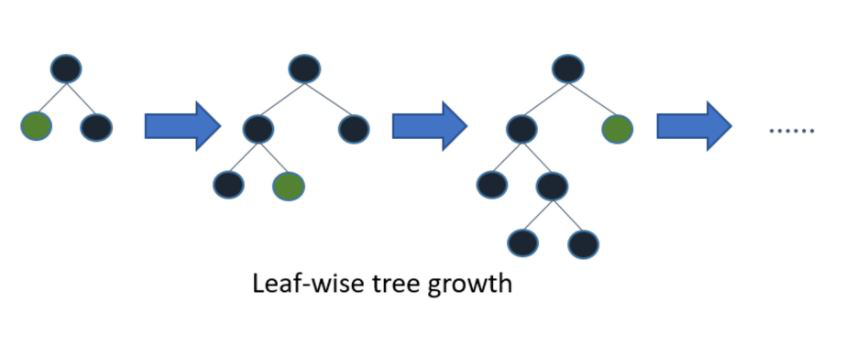

In [ ]:
Image.open("모델 개발 설명서/참고자료.jpg")

기존의 알고리즘은 수평으로 확장하여 포화 트리를 만드는 방향으로 학습하는 반면, leaf-wise tree growth인 LGBM은 최대 delta loss 가 증가하도록 잎의 개수를 정합니다. leaf-wise 알고리즘은 다른 level-wise 알고리즘보다 낮은 loss 를 달성하는 경향이 있습니다. 

### A'. 채택된 변수에 대한 설명

- sex_dit_cd 성별
- cus_age_stn_cd 연령대
- ivs_icn_cd(투자성향) 변수는 99인 값이 36% 이상으로 많아, knn을 통해 대체 해주었다. knn 으로 99에 해당하는 값 3687개 중에서 1000개만 99로 남기고, 나머지 값은 null값으로 만들고 knn 으로 n=3일때의 예측값으로 대치하였다. knn으로 예측한 값이 35, 36 등과 같이 범주형 변수가 아닌 경우, 99로 바꿔주었다. 
- cus_aet_stn_cd 자산구간 
- mrz_pdt_tp_sgm_cd 주거래상품군 
- tco_cus_grd_cd 서비스등급
- lsg_sgm_cd lift stage
- tot_ivs_te_sgm_cd 총 투자기간 
- mrz_btp_dit_cd 주거래업종구분 
----
- iem_krl_nm 종목한글명
- btp_cfc_cd 종목업종
- mkt_pr_tal_scl_tp_cd(시가총액규모유형) 변수는 기존 01 대형주/02 중형주/03 소형주/99 기타로만 분리되어 있던 것을 01 대형주/02 중형주/03 소형주/04 펀드 or 파생상품/05 우량주/99 기타로 더 세분화하여 분리하였다. 
----
- hist_d 변수는 "hold_d"값, 즉 주식 보유기간의 0.6배에 해당하는 기간을 임의로 설정하여 "hist_d"를 생성하였습니다.

### B. 분석의 범주

분석 대상은 매수가 된 날의 주식 정보만을 이용해 모델을 학습시키기 위해 매수일자와 기준일자 갑싱 같은 것만을 분석 대상으로 삼았습니다. Y 타겟으로 hold_d 를 사용하였습니다. 

### C. 모델링 진행 및 중요한 가정들

- "hold_d"값, 즉 주식 보유기간의 0.6배에 해당하는 기간을 임의로 설정하여 "hist_d"를 생성. 결국 모델은 "hist_d"만큼 주식을 보유 했을때의 "hold_d"를 예측하게 될 것입니다.
- 시가총액규모유형이 다양해 이를 코드로 바꿔 세분화했습니다. 
- 투자성향에 99가 38%로 많아 이를 knn 알고리즘을 사용해 대체 했습니다. 
- 그 결과, baseline 코드 제출 score 보다 0.5 내려가서 성능이 좋아졌습니다. 

## 2. 외부 데이터에 대한 설명

주식 종목별 특정 시점 고가 및 저가 값을 크롤링하여 새로운 변수로 만들었으나, 성능에 좋은 영향은 미치지 못해 이를 최종 모델에 포함시키지 않았습니다. 
- 데이터 종류/분류 : 종목별 주가 
- 데이터 원천/웹사이트 : 네이버 주식 
- 수집/적재 방법 : 크롤링
- 전처리 방법: 기준일자 전후 93일(3개월)간의 최고가와 최저가 일때의 날짜와 기준일자와의 일수 차이 
- 활용 방안 : 고가일 때의 일수 차이, 저가일 때의 일수차이, 거래량, 외국인 소진율을 변수로 활용함
- 활용한 이유 : 기준일가 전후의 최고가, 최저가가 매수, 매도에 영향을 미칠 것이라 판단함 
- 지속성에 대한 설명 : 모델 성능에는 좋지 않은 영향을 끼쳐 넣지 못함 